# Iteration 3 OSAS (Steps 1 – 8)

## Shiyu Lin
### slin648

In [303]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_regression
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [304]:
# Reload local python files every 2 seconds
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2.3.1 Import the Data

In [305]:
# read in data
sydney = pd.read_csv("SydneyEstateNa.csv", sep=',', header='infer')
# drop the first column
sydney = sydney.drop(sydney.columns[0], axis=1)

# head of data
sydney.head()


,logSalePrice,lotSize,longitude,latitude,saleDate,saleQtr,infRate,postCode,crimeDensity,crimeRate,...,neph,PM10,SO2,distToAmbulance,distToFactory,distToFerry,distToHospital,distToMedical,distToSchool,distToUniversity
0,14.002571,645.000000,151.081364,-33.881746,23/07/2001,3,0.131753,2135,658.072048,0.329212,...,0.325014,18.983450,0.116958,3.945106,4.778739,5.579980,1.190414,0.516930,0.229914,0.793934
1,13.024223,662.924964,150.952692,-33.865284,26/11/2001,4,0.080510,2165,369.170296,0.207048,...,0.228423,19.087556,0.104246,2.012216,4.711523,7.844125,3.218593,0.982623,0.857011,3.888091
2,13.737006,812.008339,151.288282,-33.769329,21/11/2001,4,0.054411,2096,110.100834,0.129077,...,0.302068,15.840259,0.116958,3.146526,4.523376,8.249469,0.696130,1.451547,0.821424,2.334654
3,12.063030,553.000000,150.815021,-33.732588,01/06/2001,2,0.003506,2770,220.064407,0.206920,...,0.290143,16.855367,0.065339,2.044986,3.058969,20.149325,3.818996,1.297252,0.911597,0.822585
4,14.343142,719.000000,151.204092,-33.816966,25/09/2001,3,0.016782,2065,486.317741,0.188120,...,0.302068,15.840259,0.116958,0.039839,5.096812,3.116945,1.215233,1.361083,0.242207,0.989742


### 2.3.2 Explore and visualize

In [306]:
# overview of data
sydney.describe().astype(int)


,logSalePrice,lotSize,longitude,latitude,saleQtr,infRate,postCode,crimeDensity,crimeRate,income,...,neph,PM10,SO2,distToAmbulance,distToFactory,distToFerry,distToHospital,distToMedical,distToSchool,distToUniversity
count,37676,37676,37676,37676,37676,37676,37676,37676,37676,37676,...,37676,37676,37676,37676,37676,37676,37676,37676,37676,37676
mean,13,693,151,-33,2,0,2256,390,0,1122,...,0,18,0,3,4,11,2,1,0,2
std,0,175,0,0,1,0,243,485,0,338,...,0,1,0,2,2,9,1,1,0,2
min,11,400,150,-34,1,0,2007,1,0,259,...,0,15,0,0,0,0,0,0,0,0
25%,12,578,150,-33,2,0,2100,90,0,874,...,0,16,0,1,2,5,1,0,0,1
50%,13,664,151,-33,3,0,2161,220,0,1100,...,0,18,0,3,3,9,2,1,0,2
75%,13,760,151,-33,4,0,2230,545,0,1341,...,0,19,0,4,5,15,3,2,1,3
max,16,2000,151,-33,4,0,2770,6102,1,2000,...,0,20,0,17,20,55,17,22,13,22


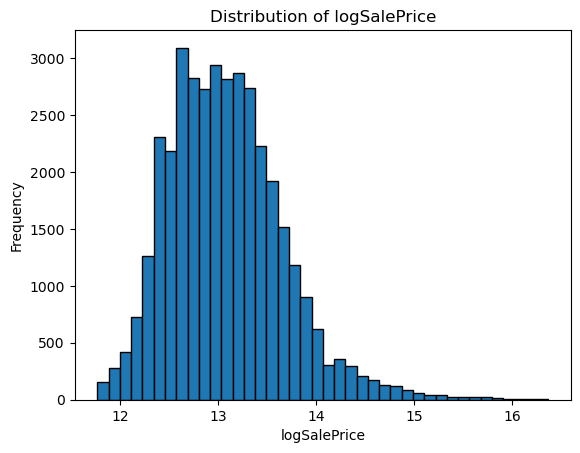

In [307]:
# plot the distribution of the response variable logSalePrice
plt.hist(sydney.logSalePrice, bins=40, edgecolor='black')
plt.title("Distribution of logSalePrice")
plt.xlabel("logSalePrice")
plt.ylabel("Frequency")
plt.show()


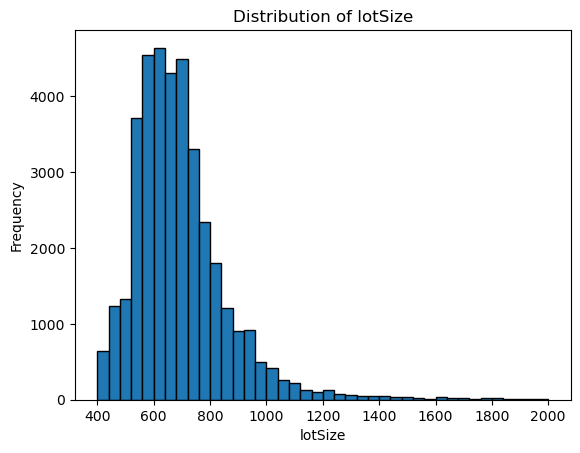

In [308]:
# plot the distribution of lotSize
plt.hist(sydney.lotSize, bins=40, edgecolor='black')
plt.title("Distribution of lotSize")
plt.xlabel("lotSize")
plt.ylabel("Frequency")
plt.show()


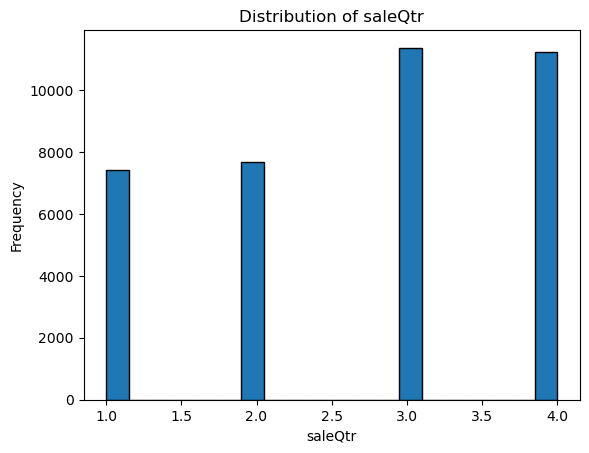

In [309]:
# plot the distribution of saleQtr
plt.hist(sydney.saleQtr, bins=20, edgecolor='black')
plt.title("Distribution of saleQtr")
plt.xlabel("saleQtr")
plt.ylabel("Frequency")
plt.show()


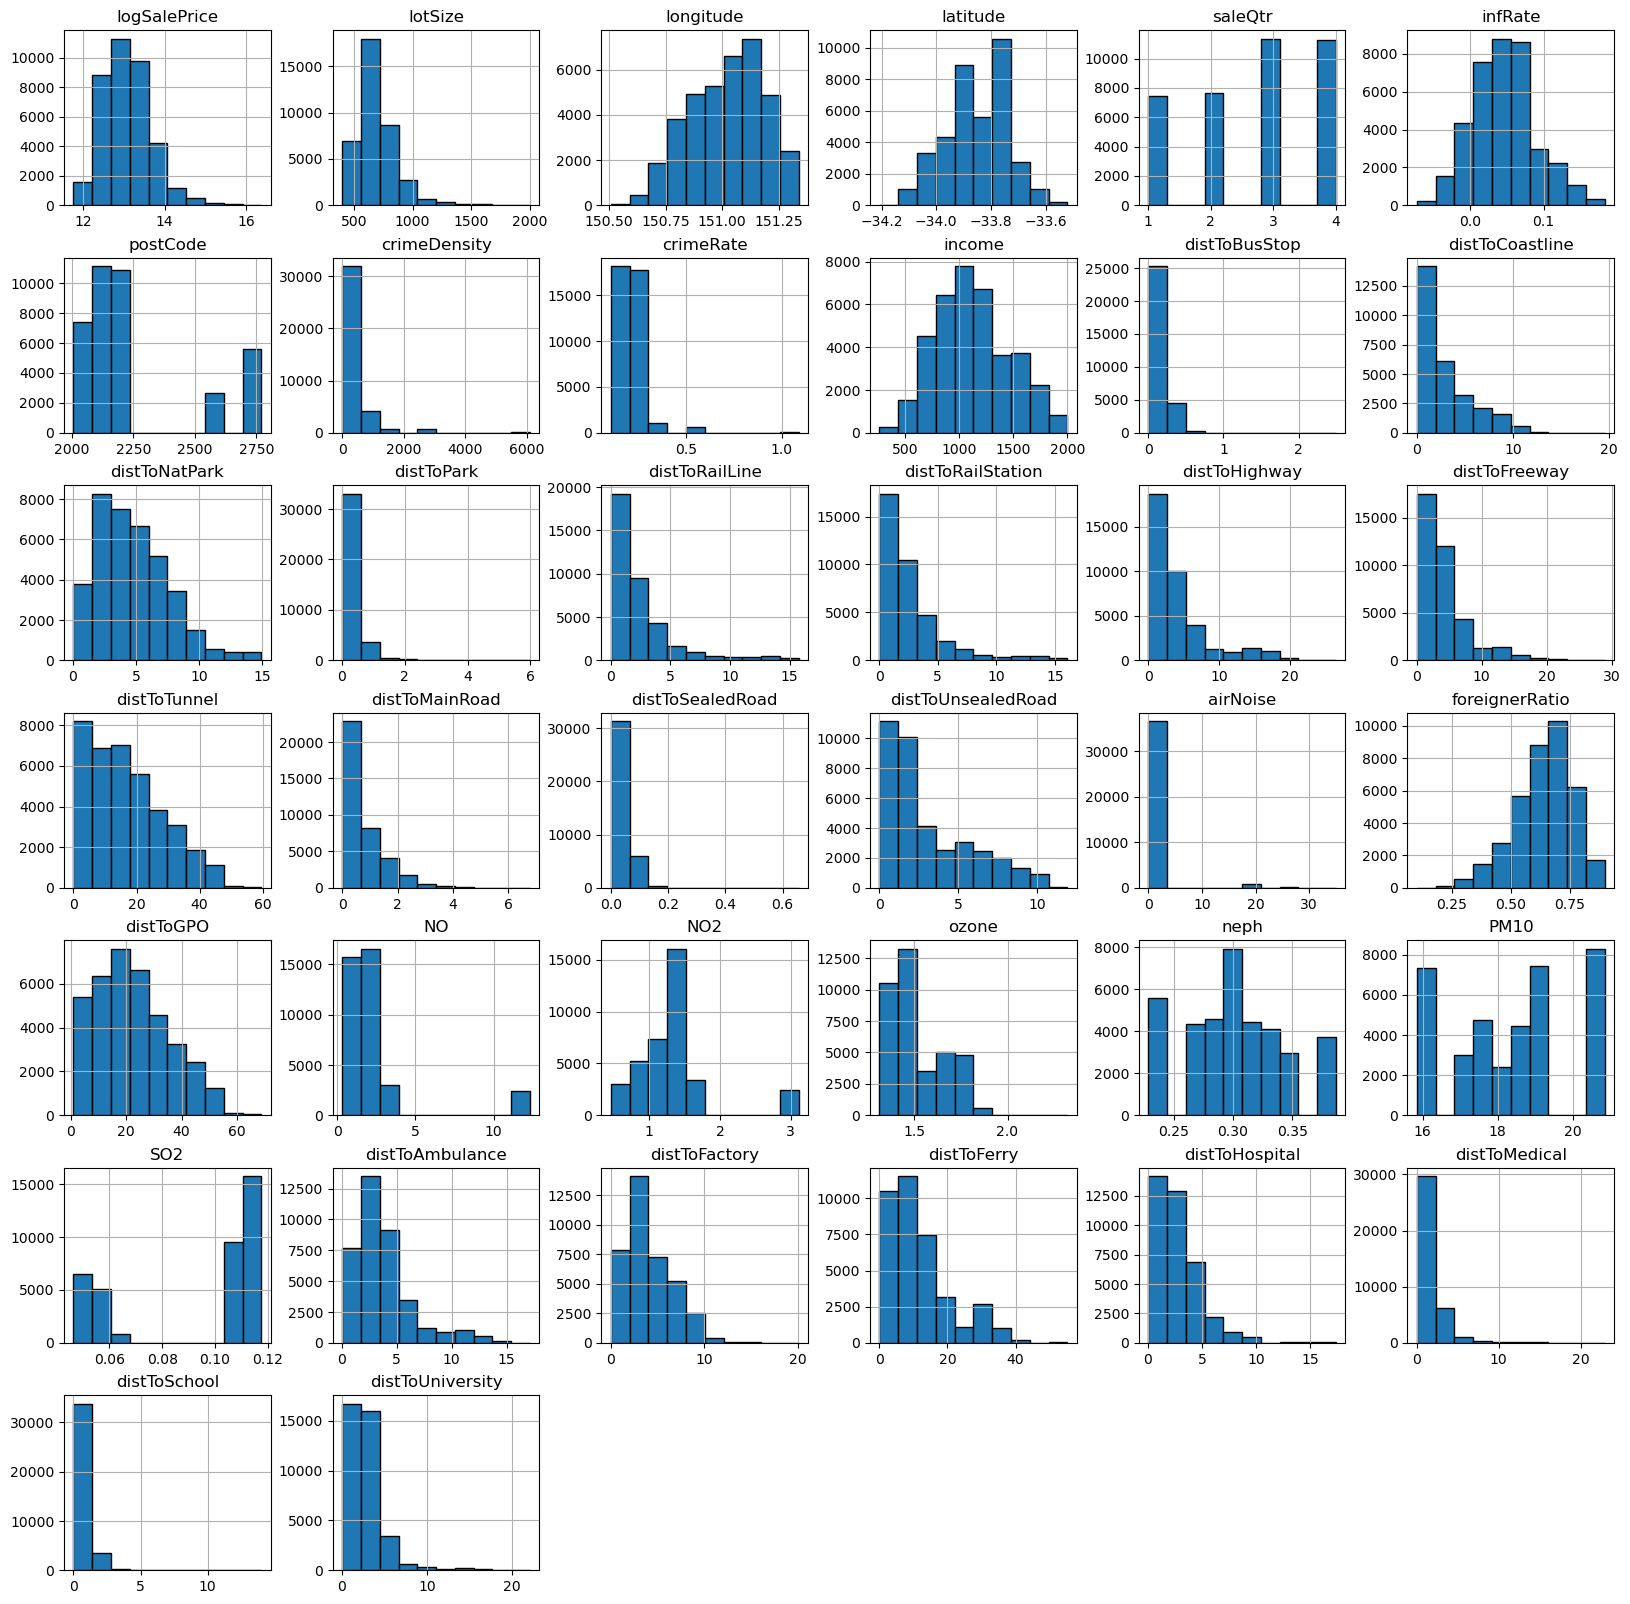

In [310]:
# a plot of all variables
sydney.hist(figsize=(20, 20), edgecolor='black')
plt.show()


### 2.4 Verify the data quality

In [311]:
sydney.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37676 entries, 0 to 37675
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   logSalePrice        37676 non-null  float64
 1   lotSize             37676 non-null  float64
 2   longitude           37676 non-null  float64
 3   latitude            37676 non-null  float64
 4   saleDate            37676 non-null  object 
 5   saleQtr             37676 non-null  int64  
 6   infRate             37676 non-null  float64
 7   postCode            37676 non-null  int64  
 8   crimeDensity        37676 non-null  float64
 9   crimeRate           37676 non-null  float64
 10  income              37676 non-null  int64  
 11  distToBusStop       30169 non-null  float64
 12  distToCoastline     27885 non-null  float64
 13  distToNatPark       37676 non-null  float64
 14  distToPark          37676 non-null  float64
 15  distToRailLine      37676 non-null  float64
 16  dist

In [312]:
# check for missing values
sydney.isnull().sum()


logSalePrice             0
lotSize                  0
longitude                0
latitude                 0
saleDate                 0
saleQtr                  0
infRate                  0
postCode                 0
crimeDensity             0
crimeRate                0
income                   0
distToBusStop         7507
distToCoastline       9791
distToNatPark            0
distToPark               0
distToRailLine           0
distToRailStation        0
distToHighway            0
distToFreeway            0
distToTunnel             0
distToMainRoad           0
distToSealedRoad         0
distToUnsealedRoad       0
airNoise                 0
foreignerRatio           0
distToGPO                0
NO                       0
NO2                      0
ozone                    0
neph                     0
PM10                     0
SO2                      0
distToAmbulance          0
distToFactory            0
distToFerry              0
distToHospital           0
distToMedical            0
d

{'whiskers': [<matplotlib.lines.Line2D at 0x1f922829d20>,
 'caps': [<matplotlib.lines.Line2D at 0x1f92282a2c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f922829a50>],
 'medians': [<matplotlib.lines.Line2D at 0x1f92282a740>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f92282aa10>],
 'means': []}

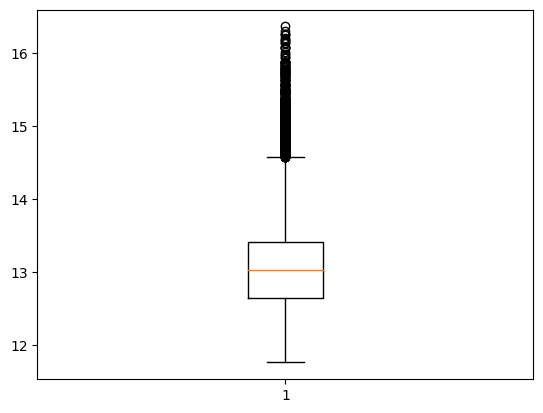

In [313]:
# plot outliers in logSalePrice
plt.boxplot(sydney.logSalePrice)


### 3.1 Select the data

In [314]:
# dimensions of data
sydney.shape


(37676, 39)

In [315]:
# drop saleDate and postCode from sydney data
sydney = sydney.drop(['saleDate', 'postCode'], axis=1)

# dimensions of data now
sydney.shape


(37676, 37)

### 3.2 Clean the data

In [316]:
# Using IterativeImputer in sklearn to handle the missing values, with initial_strategy='median'.
imputer = IterativeImputer(
    missing_values=np.nan, max_iter=12, initial_strategy='median', random_state=1234)

# Fit to data, then transform it.
imputer.fit(sydney)
sydney_imp = imputer.transform(sydney)

# convert to dataframe
sydney_imp = pd.DataFrame(sydney_imp, columns=sydney.columns)
# check for missing values
sydney_imp.isnull().sum()


logSalePrice          0
lotSize               0
longitude             0
latitude              0
saleQtr               0
infRate               0
crimeDensity          0
crimeRate             0
income                0
distToBusStop         0
distToCoastline       0
distToNatPark         0
distToPark            0
distToRailLine        0
distToRailStation     0
distToHighway         0
distToFreeway         0
distToTunnel          0
distToMainRoad        0
distToSealedRoad      0
distToUnsealedRoad    0
airNoise              0
foreignerRatio        0
distToGPO             0
NO                    0
NO2                   0
ozone                 0
neph                  0
PM10                  0
SO2                   0
distToAmbulance       0
distToFactory         0
distToFerry           0
distToHospital        0
distToMedical         0
distToSchool          0
distToUniversity      0
dtype: int64

In [317]:
# remove outliers: 3 standard deviations from the mean
for col in sydney_imp.columns:
    sydney_imp = sydney_imp[np.abs(
        sydney_imp[col]-sydney_imp[col].mean()) <= (3*sydney_imp[col].std())]

# dimensions of data now
sydney_imp.shape


(24754, 37)

### 3.3 Construct the data

In [318]:
# add new column SalePrice
# SalePrice = exp(logSalePrice)/1000
sydney_imp['SalePrice'] = np.exp(sydney_imp['logSalePrice'])/1000
sydney_imp['SalePrice'].head(10)


0     1205.699868
3      173.343432
6      173.343432
7      439.778707
8      313.302200
9      436.568643
10     526.450422
12     972.007238
15     975.859314
16    1990.239398
Name: SalePrice, dtype: float64

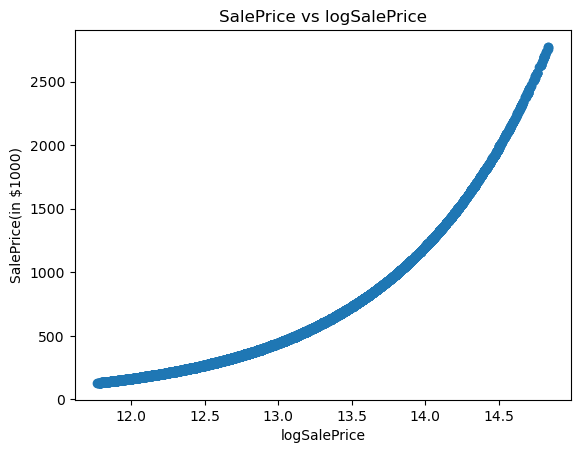

In [319]:
# plot SalePrice vs logSalePrice
plt.scatter(sydney_imp['logSalePrice'], sydney_imp['SalePrice'])
plt.title("SalePrice vs logSalePrice")
plt.xlabel("logSalePrice")
plt.ylabel("SalePrice(in $1000)")
plt.show()


### 3.4 Integrate various data sources

In [320]:
# import 2 new datasets
sydpart1 = pd.read_csv("SydneyEstateNa1.csv", sep=',', header='infer')
sydpart2 = pd.read_csv("SydneyEstateNa2.csv", sep=',', header='infer')

# merge 2 datasets
sydney_merged = pd.concat([sydpart1, sydpart2], axis=0)

# drop the first column
sydney_merged = sydney_merged.drop(sydney_merged.columns[0], axis=1)

# overview of sydney_merged
sydney_merged.describe().astype(int)


,logSalePrice,lotSize,longitude,latitude,saleQtr,infRate,postCode,crimeDensity,crimeRate,income,...,neph,PM10,SO2,distToAmbulance,distToFactory,distToFerry,distToHospital,distToMedical,distToSchool,distToUniversity
count,37676,37676,37676,37676,37676,37676,37676,37676,37676,37676,...,37676,37676,37676,37676,37676,37676,37676,37676,37676,37676
mean,13,693,151,-33,2,0,2256,390,0,1122,...,0,18,0,3,4,11,2,1,0,2
std,0,175,0,0,1,0,243,485,0,338,...,0,1,0,2,2,9,1,1,0,2
min,11,400,150,-34,1,0,2007,1,0,259,...,0,15,0,0,0,0,0,0,0,0
25%,12,578,150,-33,2,0,2100,90,0,874,...,0,16,0,1,2,5,1,0,0,1
50%,13,664,151,-33,3,0,2161,220,0,1100,...,0,18,0,3,3,9,2,1,0,2
75%,13,760,151,-33,4,0,2230,545,0,1341,...,0,19,0,4,5,15,3,2,1,3
max,16,2000,151,-33,4,0,2770,6102,1,2000,...,0,20,0,17,20,55,17,22,13,22


### 3.5 Format the data as required

In [321]:
# saleQtr as categorical variable
sydney_imp['saleQtr'] = sydney_imp['saleQtr'].astype('category')
# check
sydney_imp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24754 entries, 0 to 37675
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   logSalePrice        24754 non-null  float64 
 1   lotSize             24754 non-null  float64 
 2   longitude           24754 non-null  float64 
 3   latitude            24754 non-null  float64 
 4   saleQtr             24754 non-null  category
 5   infRate             24754 non-null  float64 
 6   crimeDensity        24754 non-null  float64 
 7   crimeRate           24754 non-null  float64 
 8   income              24754 non-null  float64 
 9   distToBusStop       24754 non-null  float64 
 10  distToCoastline     24754 non-null  float64 
 11  distToNatPark       24754 non-null  float64 
 12  distToPark          24754 non-null  float64 
 13  distToRailLine      24754 non-null  float64 
 14  distToRailStation   24754 non-null  float64 
 15  distToHighway       24754 non-null  

In [322]:
# split explanatory and response variables
X = sydney_imp.drop(['logSalePrice', 'SalePrice'], axis=1)
log_y = sydney_imp['logSalePrice']
y = sydney_imp['SalePrice']


In [323]:
X.head()


,lotSize,longitude,latitude,saleQtr,infRate,crimeDensity,crimeRate,income,distToBusStop,distToCoastline,...,neph,PM10,SO2,distToAmbulance,distToFactory,distToFerry,distToHospital,distToMedical,distToSchool,distToUniversity
0,645.000000,151.081364,-33.881746,3.0,0.131753,658.072048,0.329212,1564.0,0.153313,2.142680,...,0.325014,18.983450,0.116958,3.945106,4.778739,5.579980,1.190414,0.516930,0.229914,0.793934
3,553.000000,150.815021,-33.732588,2.0,0.003506,220.064407,0.206920,804.0,0.047612,14.127644,...,0.290143,16.855367,0.065339,2.044986,3.058969,20.149325,3.818996,1.297252,0.911597,0.822585
6,575.000000,150.803617,-33.754383,4.0,0.082403,220.064407,0.206920,504.0,0.122905,13.337931,...,0.290143,16.855367,0.104246,1.319172,1.649167,20.183875,2.672311,1.214924,0.630336,0.623362
7,700.262571,151.042088,-33.804476,3.0,0.035158,589.112798,0.251134,823.0,0.056877,1.443709,...,0.228423,19.087556,0.116958,5.208205,2.356500,3.097816,1.512533,1.845819,0.464874,1.620972
8,721.000000,151.035486,-33.865321,4.0,0.023668,573.368191,0.333071,804.0,0.128562,3.420364,...,0.325014,18.983450,0.116958,1.682641,7.225857,6.221853,0.595347,1.058978,0.280087,1.750704


In [324]:
log_y.head()


0    14.002571
3    12.063030
6    12.063030
7    12.994027
8    12.654924
Name: logSalePrice, dtype: float64

In [325]:
y.head()


0    1205.699868
3     173.343432
6     173.343432
7     439.778707
8     313.302200
Name: SalePrice, dtype: float64

### 4.1 Reduce the data

In [326]:
# select the best 10 features
F_select = SelectKBest(score_func=f_regression, k=10)
X_select = F_select.fit_transform(X, log_y)

index_list = F_select.get_support()
index_select = []
for i in range(X.shape[1]):
    if index_list[i] == 1:
        index_select.append(i)

index_select


[0, 1, 6, 7, 9, 10, 16, 19, 22, 31]

In [327]:
# importances of features
scores = F_select.scores_
colnames = X.columns
importances = pd.DataFrame({'feature': colnames, 'importance': scores})
importances = importances.sort_values('importance', ascending=False)
importances.head(10)


,feature,importance
1,longitude,26257.906256
22,distToGPO,19041.788523
16,distToTunnel,15378.514025
9,distToCoastline,11632.170593
7,income,8988.726618
31,distToFerry,8821.533225
19,distToUnsealedRoad,8376.951349
10,distToNatPark,7297.084450
0,lotSize,4661.292072
6,crimeRate,3711.113391


In [328]:
# convert to dataframe
df_X_select = pd.DataFrame(X_select)
# change column names
df_X_select.columns = X.columns[index_select]
# check
df_X_select.head()


,lotSize,longitude,crimeRate,income,distToCoastline,distToNatPark,distToTunnel,distToUnsealedRoad,distToGPO,distToFerry
0,645.000000,151.081364,0.329212,1564.0,2.142680,6.923308,7.500839,7.862015,11.823826,5.579980
1,553.000000,150.815021,0.206920,804.0,14.127644,7.685946,32.114024,1.915779,39.345297,20.149325
2,575.000000,150.803617,0.206920,504.0,13.337931,9.082003,34.199691,0.750949,39.472682,20.183875
3,700.262571,151.042088,0.251134,823.0,1.443709,4.243691,16.213310,3.859965,16.924224,3.097816
4,721.000000,151.035486,0.333071,804.0,3.420364,6.876696,11.710323,3.744639,15.968499,6.221853


### 4.2 Project the data

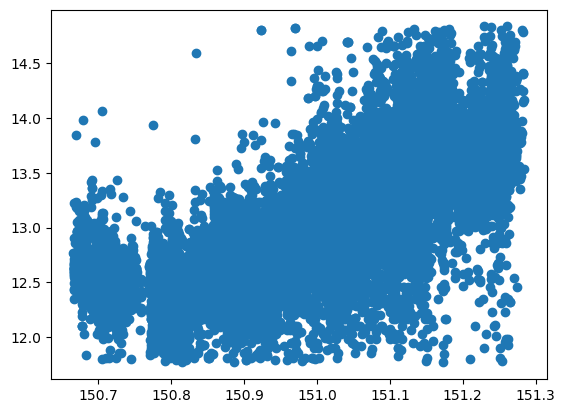

In [329]:
# plot longitude vs logSalePrice
plt.scatter(df_X_select['longitude'], log_y)


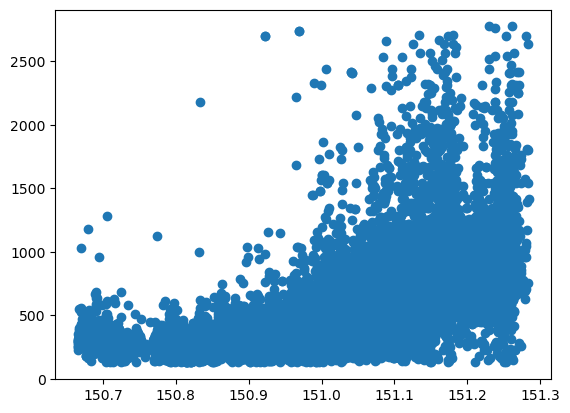

In [330]:
# plot longitude vs SalePrice
plt.scatter(df_X_select['longitude'], y)


### 6.3 Build/Select appropriate model(s) and choose relevant parameter(s)

In [331]:
# linear regression model
def Linear_reg(X, y, n_splits=5, n_repeats=5):
    """
    This function performs a linear regression model on the data X and y.
    It returns the mean and standard deviation of the R-squared and RMSE.
    """
    # list to store R-squared and RMSE
    R2_list = []
    RMSE_list = []

    # split data into training and test sets
    kf = RepeatedKFold(n_splits=n_splits,
                       n_repeats=n_repeats, random_state=648)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # predict
        y_pred = model.predict(X_test)

        # evaluate the model
        R2 = r2_score(y_test, y_pred)
        RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

        # append to list
        R2_list.append(R2)
        RMSE_list.append(RMSE)

    # mean and standard deviation of R-squared and RMSE
    R2_mean = np.mean(R2_list)
    R2_std = np.std(R2_list)
    RMSE_mean = np.mean(RMSE_list)
    RMSE_std = np.std(RMSE_list)

    return R2_mean, R2_std, RMSE_mean, RMSE_std


In [332]:
# random forest model
def Random_forest(X, y, n_splits=5, n_repeats=5):
    """
    This function performs a random forest model on the data X and y.
    It returns the mean and standard deviation of the R-squared and RMSE.
    """
    # list to store R-squared and RMSE
    R2_list = []
    RMSE_list = []

    # split data into training and test sets
    kf = RepeatedKFold(n_splits=n_splits,
                       n_repeats=n_repeats, random_state=648)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # fit the model
        model = RandomForestRegressor(n_estimators=20, random_state=648)
        model.fit(X_train, y_train)

        # predict
        y_pred = model.predict(X_test)

        # evaluate the model
        R2 = r2_score(y_test, y_pred)
        RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

        # append to list
        R2_list.append(R2)
        RMSE_list.append(RMSE)

    # mean and standard deviation of R-squared and RMSE
    R2_mean = np.mean(R2_list)
    R2_std = np.std(R2_list)
    RMSE_mean = np.mean(RMSE_list)
    RMSE_std = np.std(RMSE_list)

    return R2_mean, R2_std, RMSE_mean, RMSE_std


### 7.2 Conduct data mining

In [333]:
# Univariate Linear Regression
# only 'longitude' as explanatory variable
df_longitude = df_X_select[['longitude']]
R2_mean, R2_std, RMSE_mean, RMSE_std = Linear_reg(
    df_longitude, log_y)

# make a table of results
results = pd.DataFrame({'Model': ['Univariate Linear Regression'],
                        'R-squared': [R2_mean],
                        'R-squared std': [R2_std],
                        'RMSE': [RMSE_mean],
                        'RMSE std': [RMSE_std]})
results


,Model,R-squared,R-squared std,RMSE,RMSE std
0,Univariate Linear Regression,0.514561,0.009542,0.351508,0.003713


In [334]:
# Multivariate Linear Regression
R2_mean, R2_std, RMSE_mean, RMSE_std = Linear_reg(df_X_select, log_y)

# concat the results to the table
results = pd.concat([results, pd.DataFrame({'Model': ['Multivariate Linear Regression'],
                                            'R-squared': [R2_mean],
                                            'R-squared std': [R2_std],
                                            'RMSE': [RMSE_mean],
                                            'RMSE std': [RMSE_std]})])
results


,Model,R-squared,R-squared std,RMSE,RMSE std
0,Univariate Linear Regression,0.514561,0.009542,0.351508,0.003713
0,Multivariate Linear Regression,0.665940,0.007956,0.291587,0.003577


In [335]:
# random forest
R2_mean, R2_std, RMSE_mean, RMSE_std = Random_forest(df_X_select, log_y)

# concat the results to the table
results = pd.concat([results, pd.DataFrame({'Model': ['Random Forest'],
                                            'R-squared': [R2_mean],
                                            'R-squared std': [R2_std],
                                            'RMSE': [RMSE_mean],
                                            'RMSE std': [RMSE_std]})])
results


,Model,R-squared,R-squared std,RMSE,RMSE std
0,Univariate Linear Regression,0.514561,0.009542,0.351508,0.003713
0,Multivariate Linear Regression,0.665940,0.007956,0.291587,0.003577
0,Random Forest,0.723098,0.008461,0.265447,0.003183


### 7.3 Search for patterns

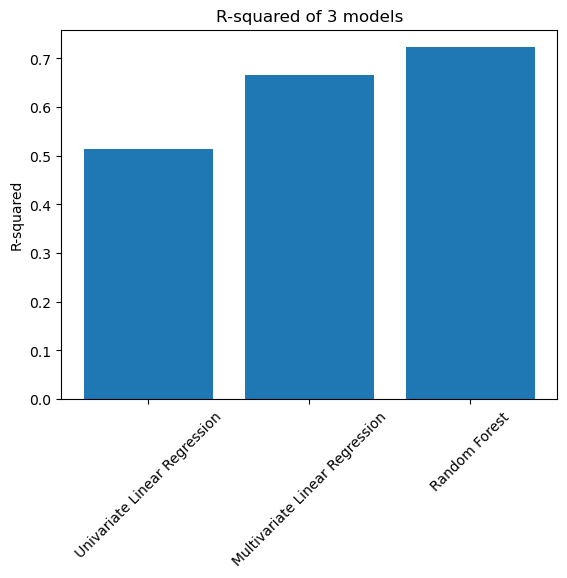

In [336]:
# plot the results: R-squared
plt.bar(results['Model'], results['R-squared'])
plt.title('R-squared of 3 models')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.show()


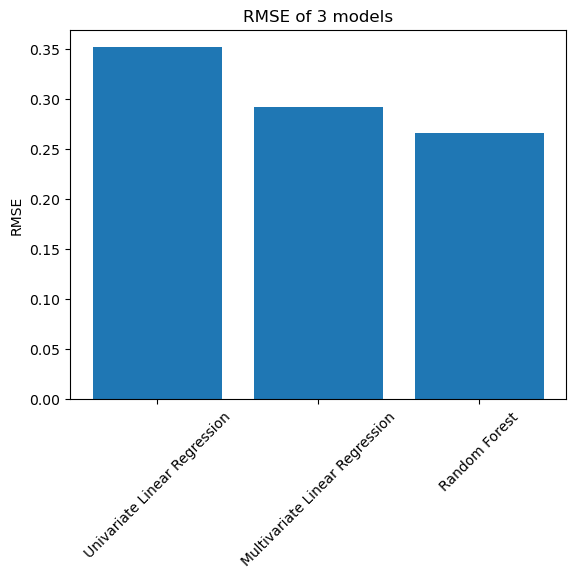

In [337]:
# plot the results: RMSE
plt.bar(results['Model'], results['RMSE'])
plt.title('RMSE of 3 models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()


### 8.2 Visualize the data, results, models, and patterns

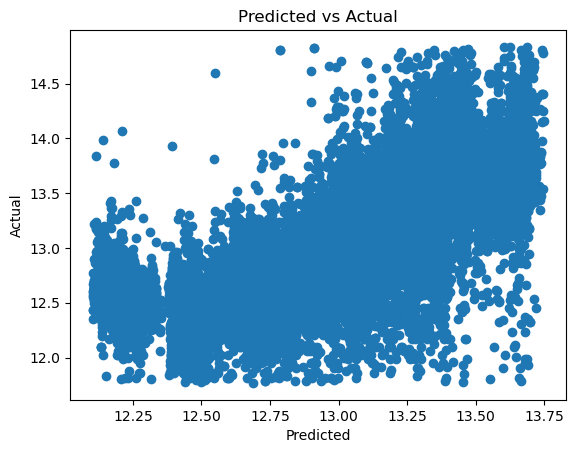

In [338]:
# linear regression model
model = LinearRegression()
model.fit(df_X_select[['longitude']], log_y)

# plot predicted vs actual
plt.scatter(model.predict(df_X_select[['longitude']]), log_y)
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


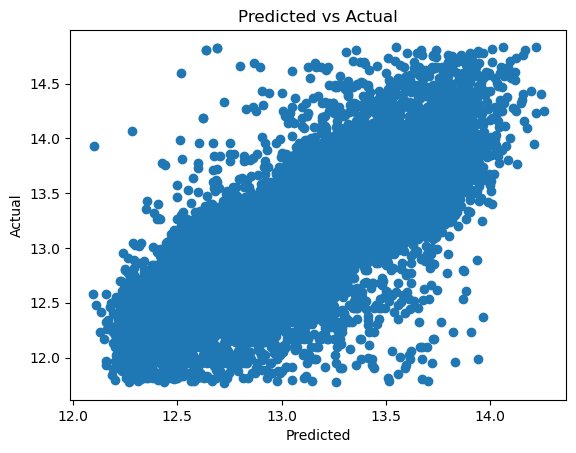

In [339]:
# multiple linear regression model
model = LinearRegression()
model.fit(df_X_select, log_y)

# plot predicted vs actual
plt.scatter(model.predict(df_X_select), log_y)
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


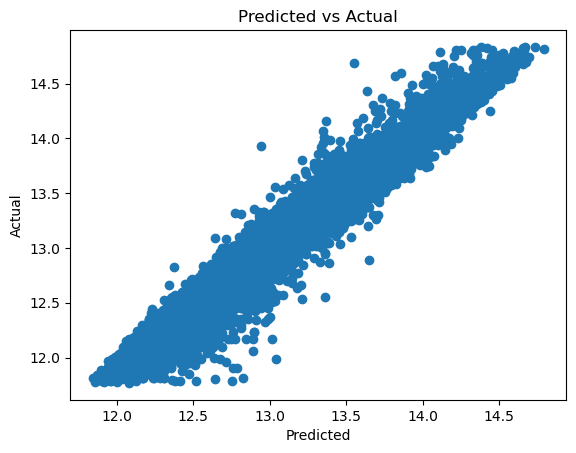

In [340]:
# random forest model
model = RandomForestRegressor(n_estimators=20, random_state=648)
model.fit(df_X_select, log_y)

# plot predicted vs actual
plt.scatter(model.predict(df_X_select), log_y)
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


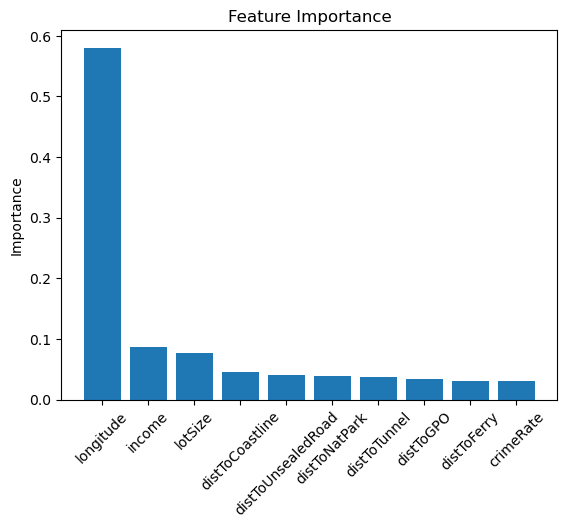

In [341]:
# the feature importance of random forest
importance_RF = model.feature_importances_
importance_RF = pd.DataFrame(importance_RF, index=df_X_select.columns,
                             columns=['importance'])
importance_RF = importance_RF.sort_values(by='importance', ascending=False)

# plot the feature importance
plt.bar(importance_RF.index, importance_RF['importance'])
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


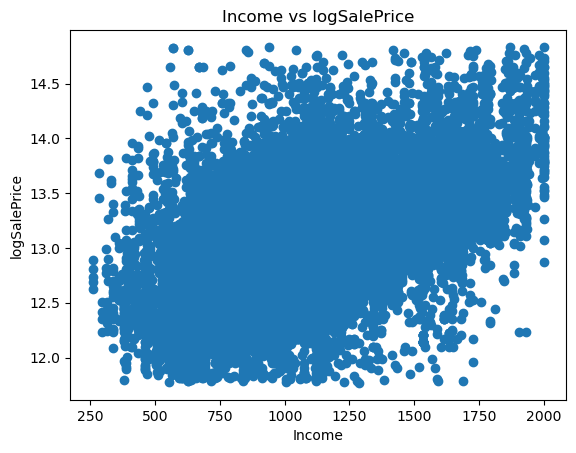

In [342]:
# plot income vs logSalePrice
plt.scatter(df_X_select[['income']], log_y)
plt.title('Income vs logSalePrice')
plt.xlabel('Income')
plt.ylabel('logSalePrice')
plt.show()


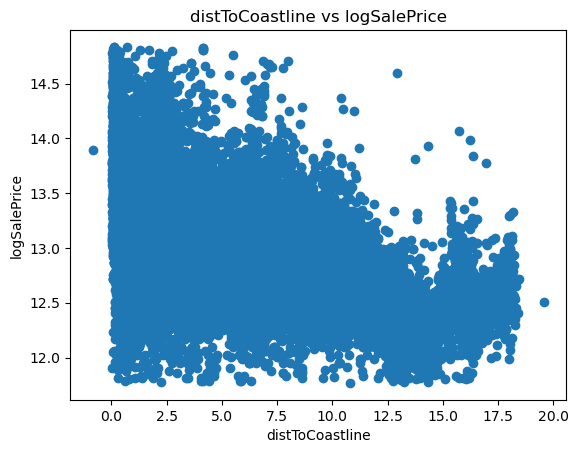

In [343]:
# plot distToCoastline vs logSalePrice
plt.scatter(df_X_select[['distToCoastline']], log_y)
plt.title('distToCoastline vs logSalePrice')
plt.xlabel('distToCoastline')
plt.ylabel('logSalePrice')
plt.show()


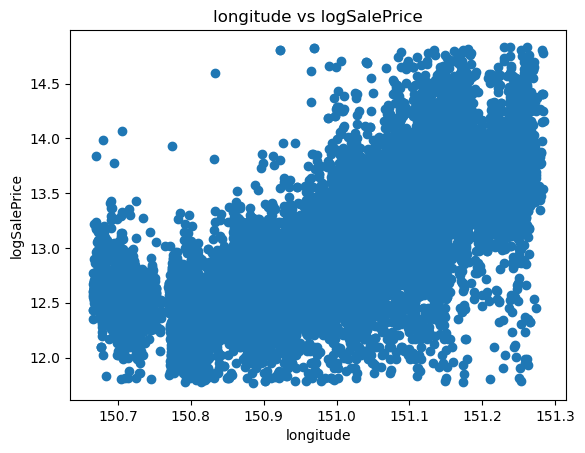

In [344]:
# plot longitude vs logSalePrice
plt.scatter(df_X_select[['longitude']], log_y)
plt.title('longitude vs logSalePrice')
plt.xlabel('longitude')
plt.ylabel('logSalePrice')
plt.show()


### 8.3 Interpret the results, models, and patterns

In [345]:
# model parameters of linear regression model
model = LinearRegression()
model.fit(df_X_select[['longitude']], log_y)

# print the intercept
print('Intercept: ', model.intercept_)

# coefficient table
coef_table = pd.DataFrame(model.coef_, index=['longitude'],
                          columns=['Coefficient'])
coef_table


Intercept:  -388.4452684038436


,Coefficient
longitude,2.658531


In [346]:
# model parameters of multiple linear regression model
model = LinearRegression()
model.fit(df_X_select, log_y)

# print the intercept
print('Intercept: ', model.intercept_)

# coefficient table
coef_table = pd.DataFrame(model.coef_, index=df_X_select.columns,
                          columns=['Coefficient'])
coef_table


Intercept:  -358.04153499245746


,Coefficient
lotSize,0.000621
longitude,2.449207
crimeRate,0.262602
income,0.000422
distToCoastline,-0.007721
distToNatPark,-0.014630
distToTunnel,0.005840
distToUnsealedRoad,0.038511
distToGPO,0.004832
distToFerry,0.005692


### 8.5 Iterate prior steps (1 – 7) as required

In [347]:
# try to fit the models using SalePrice instead of logSalePrice
# Univariate Linear Regression
# only 'longitude' as explanatory variable
df_longitude = df_X_select[['longitude']]
R2_mean, R2_std, RMSE_mean, RMSE_std = Linear_reg(
    df_longitude, y)

# make a table of results
results_ = pd.DataFrame({'Model': ['Univariate Linear Regression'],
                        'R-squared': [R2_mean],
                         'R-squared std': [R2_std],
                         'RMSE': [RMSE_mean],
                         'RMSE std': [RMSE_std]})

# Multivariate Linear Regression
R2_mean, R2_std, RMSE_mean, RMSE_std = Linear_reg(df_X_select, y)

# concat the results to the table
results_ = pd.concat([results_, pd.DataFrame({'Model': ['Multivariate Linear Regression'],
                                              'R-squared': [R2_mean],
                                              'R-squared std': [R2_std],
                                              'RMSE': [RMSE_mean],
                                              'RMSE std': [RMSE_std]})])
# random forest
R2_mean, R2_std, RMSE_mean, RMSE_std = Random_forest(df_X_select, y)

# concat the results to the table
results_ = pd.concat([results_, pd.DataFrame({'Model': ['Random Forest'],
                                              'R-squared': [R2_mean],
                                              'R-squared std': [R2_std],
                                              'RMSE': [RMSE_mean],
                                              'RMSE std': [RMSE_std]})])
results_


,Model,R-squared,R-squared std,RMSE,RMSE std
0,Univariate Linear Regression,0.380720,0.010294,243.120266,6.561524
0,Multivariate Linear Regression,0.537234,0.010790,210.158142,5.982614
0,Random Forest,0.657986,0.011779,180.609791,3.803767


In [348]:
# gradient boosting model
def Gradient_boosting(X, y, n_splits=5, n_repeats=5):
    """
    This function performs a gradient boosting model on the data X and y.
    It returns the mean and standard deviation of the R-squared and RMSE.
    """
    # list to store R-squared and RMSE
    R2_list = []
    RMSE_list = []

    # split data into training and test sets
    kf = RepeatedKFold(n_splits=n_splits,
                       n_repeats=n_repeats, random_state=648)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # fit the model
        model = GradientBoostingRegressor(random_state=648)
        model.fit(X_train, y_train)

        # predict
        y_pred = model.predict(X_test)

        # evaluate the model
        R2 = r2_score(y_test, y_pred)
        RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

        # append to list
        R2_list.append(R2)
        RMSE_list.append(RMSE)

    # mean and standard deviation of R-squared and RMSE
    R2_mean = np.mean(R2_list)
    R2_std = np.std(R2_list)
    RMSE_mean = np.mean(RMSE_list)
    RMSE_std = np.std(RMSE_list)

    return R2_mean, R2_std, RMSE_mean, RMSE_std


In [349]:
# gradient boosting
R2_mean, R2_std, RMSE_mean, RMSE_std = Gradient_boosting(df_X_select, log_y)

# concat the results to the table
results = pd.concat([results, pd.DataFrame({'Model': ['Gradient Boosting'],
                                            'R-squared': [R2_mean],
                                            'R-squared std': [R2_std],
                                            'RMSE': [RMSE_mean],
                                            'RMSE std': [RMSE_std]})])
results


,Model,R-squared,R-squared std,RMSE,RMSE std
0,Univariate Linear Regression,0.514561,0.009542,0.351508,0.003713
0,Multivariate Linear Regression,0.665940,0.007956,0.291587,0.003577
0,Random Forest,0.723098,0.008461,0.265447,0.003183
0,Gradient Boosting,0.716939,0.008964,0.268389,0.003993
